# Лабораторна робота №11: Вступ до Natural Language Processing (NLP)

**Виконав:** [Лаптєв Олександр]
**Група:** [VІТ-31]

## 1. Мета роботи
Познайомитися з основними поняттями, методами та підходами у сфері обробки природної мови (NLP). Провести порівняльний аналіз алгоритмів та інструментів.

## 2. Теоретичне дослідження та Практична демонстрація

У цьому розділі ми розглянемо основні етапи NLP (Токенізація, Лематизація, Сстемінг, NER) та продемонструємо їх роботу за допомогою бібліотек `NLTK` та `SpaCy`.

### 2.1 Підготовка середовища

In [9]:
# Встановлення необхідних бібліотек (розкоментуйте, якщо не встановлено)
# !pip install nltk spacy scikit-learn
# !python -m spacy download en_core_web_sm

import nltk
import spacy
import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Завантаження ресурсів NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Завантаження необхідного пакету для токенізації
nltk.download('punkt_tab')

# Завантаження моделі SpaCy
nlp = spacy.load("en_core_web_sm")

print("Бібліотеки успішно завантажено.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igarl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igarl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\igarl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\igarl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Бібліотеки успішно завантажено.


### 2.2 Токенізація, Лематазація та Сстемінг

* **Токенізація** — розбиття тексту на окремі елементи (слова, розділові знаки).
* **Сстемінг (Stemming)** — відсікання закінчень для отримання основи слова (часто грубе).
* **Лематизація (Lemmatization)** — приведення слова до його словникової форми (леми) з урахуванням контексту.

In [10]:
# Приклад тексту
text = "The quick brown foxes are jumping over the lazy dogs. They loved running fast."

# 1. Токенізація (NLTK)
tokens = word_tokenize(text)

# 2. Сстемінг (NLTK)
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in tokens]

# 3. Лематизація (NLTK)
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in tokens]

# Порівняння результатів
df_preprocessing = pd.DataFrame({
    'Token': tokens,
    'Stem': stems,
    'Lemma': lemmas
})

print("Порівняння обробки тексту:")
display(df_preprocessing.head(10))

Порівняння обробки тексту:


,Token,Stem,Lemma
0,The,the,The
1,quick,quick,quick
2,brown,brown,brown
3,foxes,fox,fox
4,are,are,are
5,jumping,jump,jumping
6,over,over,over
7,the,the,the
8,lazy,lazi,lazy
9,dogs,dog,dog


### 2.3 Розпізнавання сутностей (NER)

**NER (Named Entity Recognition)** — це задача вилучення з тексту іменованих сутностей, таких як імена людей, назви організацій, локації, дати тощо.

Нижче наведено приклад використання `SpaCy` для NER.

In [11]:
# Текст з іменованими сутностями
ner_text = "Apple Inc. is planning to open a new store in Kyiv on September 2024."

# Обробка через SpaCy pipeline
doc = nlp(ner_text)

print(f"Текст: {ner_text}\n")
print("Знайдені сутності:")
for ent in doc.ents:
    print(f" - {ent.text} -> {ent.label_} ({spacy.explain(ent.label_)})")

Текст: Apple Inc. is planning to open a new store in Kyiv on September 2024.

Знайдені сутності:
 - Apple Inc. -> ORG (Companies, agencies, institutions, etc.)
 - September 2024 -> DATE (Absolute or relative dates or periods)


## 3. Порівняльний аналіз методів векторизації тексту

Векторизація — це процес перетворення тексту у числовий вигляд, зрозумілий алгоритмам машинного навчання.

Нижче наведено порівняльну таблицю трьох основних підходів: **Bag of Words**, **TF-IDF** та **Word Embeddings**.

| Характеристика | Bag of Words (BoW) | TF-IDF (Term Frequency-Inverse Document Frequency) | Word Embeddings (Word2Vec, GloVe) |
|---|---|---|---|
| **Принцип роботи** | Підраховує кількість входжень кожного слова в документі. | Враховує частоту слова, але зменшує вагу слів, що зустрічаються часто у всіх документах. | Відображає слова у щільний векторний простір, де семантично схожі слова знаходяться поруч. |
| **Переваги** | Простий у розумінні та реалізації. Ефективний для простих задач класифікації. | Дозволяє виділити специфічні для документу слова. Краще за BoW для пошуку. | Зберігає семантичний зміст (король - чоловік + жінка = королева). Вектори невеликої розмірності. |
| **Недоліки** | Втрачає порядок слів та семантику. Створює розріджені матриці (sparse matrix). | Також створює розріджені матриці. Не враховує контекст та синоніми. | Потребує великих обсягів даних для навчання. Складніший у тренуванні. |
| **Складність реалізації** | Низька | Низька | Середня/Висока |
| **Масштабованість** | Погана (словник росте з новими даними) | Погана (розмірність залежить від словника) | Добра (фіксована розмірність вектора) |

=== 1. Bag of Words (Частота слів) ===


,and,document,first,is,one,second,the,third,this
Doc 1,0,1,1,1,0,0,1,0,1
Doc 2,0,2,0,1,0,1,1,0,1
Doc 3,1,0,0,1,1,0,1,1,1
Doc 4,0,1,1,1,0,0,1,0,1



=== 2. TF-IDF (Важливість слів) ===


,and,document,first,is,one,second,the,third,this
Doc 1,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
Doc 2,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
Doc 3,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
Doc 4,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


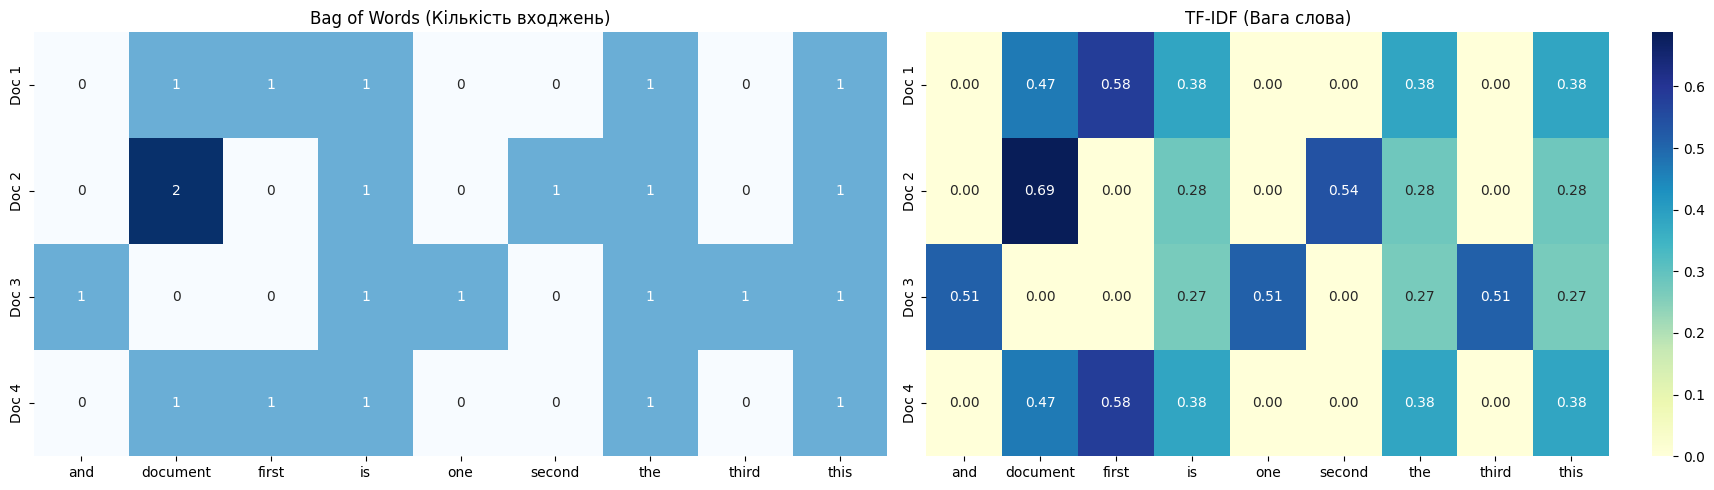

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Корпус текстів
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# 1. Bag of Words (BoW)
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(corpus)

# Створюємо DataFrame для BoW
df_bow = pd.DataFrame(X_bow.toarray(), 
                      columns=vectorizer_bow.get_feature_names_out(),
                      index=[f"Doc {i+1}" for i in range(len(corpus))])

# 2. TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

# Створюємо DataFrame для TF-IDF
df_tfidf = pd.DataFrame(X_tfidf.toarray(), 
                        columns=vectorizer_tfidf.get_feature_names_out(),
                        index=[f"Doc {i+1}" for i in range(len(corpus))])

# --- ВІЗУАЛІЗАЦІЯ ---

print("=== 1. Bag of Words (Частота слів) ===")
display(df_bow)

print("\n=== 2. TF-IDF (Важливість слів) ===")
display(df_tfidf)

# Побудова теплових карт для порівняння
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.heatmap(df_bow, annot=True, cbar=False, cmap="Blues", fmt="d", ax=ax[0])
ax[0].set_title("Bag of Words (Кількість входжень)")
ax[0].set_ylabel("")

sns.heatmap(df_tfidf, annot=True, cbar=True, cmap="YlGnBu", fmt=".2f", ax=ax[1])
ax[1].set_title("TF-IDF (Вага слова)")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()

## 4. Огляд інструментів для NLP

Порівняння популярних бібліотек для Python, що використовуються в NLP задачах: **NLTK**, **SpaCy**, **Hugging Face Transformers**, **Gensim**.

| Інструмент | Основне призначення | Особливості та Функції | Переваги |
|---|---|---|---|
| **NLTK** (Natural Language Toolkit) | Навчання, прототипування, лінгвістичний аналіз. | Величезний набір корпусів, інструменти для токенізації, стемінгу, парсингу. | Найкращий для навчання та академічних цілей. |
| **SpaCy** | Промислова розробка (Production-ready NLP). | Швидка токенізація, NER, POS-tagging, dependency parsing, підтримка векторів. | Дуже швидкий, зручний API, підтримка багатьох мов (в т.ч. української). |
| **Gensim** | Тематичне моделювання (Topic Modeling), векторизація. | Реалізація Word2Vec, Doc2Vec, FastText, Latent Dirichlet Allocation (LDA). | Ефективна робота з великими текстами, спеціалізація на векторах. |
| **Hugging Face Transformers** | Використання сучасних Deep Learning моделей (BERT, GPT). | Доступ до тисяч попередньо навчених моделей (SOTA) для перекладу, генерації, класифікації. | Доступ до найсучасніших технологій (Transformer models). |

## 5. Висновки

У ході виконання лабораторної роботи було проведено теоретичне дослідження та практичне порівняння основних методів обробки природної мови (NLP).

### 1. Етап попередньої обробки (Preprocessing)
Практичні експерименти показали, що якість очищення тексту критично впливає на подальший аналіз.
* **Токенізація** є фундаментом будь-якої NLP задачі. Використання бібліотеки `NLTK` потребує додаткового завантаження пакетів (наприклад, `punkt_tab`), тоді як `SpaCy` пропонує більш "коробкове" рішення.
* **Лематизація vs Сстемінг:** Сстемінг (PorterStemmer) працює швидше, але часто створює неіснуючі слова (наприклад, "run" -> "run"), відрізаючи закінчення. Лематизація (WordNetLemmatizer, SpaCy) є точнішою, оскільки приводить слово до словникової форми, враховуючи контекст, що є кращим для задач аналізу змісту.

### 2. Порівняння методів векторизації
Аналіз методів `Bag of Words`, `TF-IDF` та `Word Embeddings` дозволив зробити наступні висновки:
* **TF-IDF** є значно ефективнішим за звичайний підрахунок слів (BoW) для задач пошуку ключових слів та класифікації документів, оскільки він зменшує вагу загальновживаних слів (стоп-слів). Однак обидва методи створюють розріджені матриці великої розмірності та не враховують порядок слів.
* **Word Embeddings (Word2Vec, GloVe)** вирішують проблему синонімії та контексту, розміщуючи семантично схожі слова поруч у векторному просторі. Це робить їх незамінними для складних задач, таких як машинний переклад або чат-боти, хоча вони вимагають більше ресурсів для навчання.

### 3. Вибір інструментів
* **NLTK:** Ідеальний для навчальних цілей та глибокого лінгвістичного аналізу, але повільніший для великих обсягів даних.
* **SpaCy:** Найкращий вибір для продакшн-систем завдяки оптимізованій швидкодії, зручному API (Pipeline) та вбудованій підтримці Named Entity Recognition (NER).
* **Gensim:** Ефективний спеціалізований інструмент для тематичного моделювання та роботи з векторними представленнями слів.
* **Hugging Face:** Надає доступ до State-of-the-Art моделей (Transformers), які наразі демонструють найкращі результати в індустрії, але потребують GPU для ефективної роботи.

### 4. Рекомендації щодо застосування
* Для **простої класифікації спаму** або аналізу тональності на невеликих датасетах достатньо комбінації **TF-IDF + Логістична регресія**.
* Для **вилучення інформації** (імена, дати, локації) найкраще підходить **SpaCy**.
* Для побудови **розумних асистентів** або систем перекладу необхідно використовувати архітектуру **Transformers (BERT, GPT)**.
